# Modelo preditivo - Tempo de permanência

1. Utiliza dataframe pré-processado e com feature engineering

In [8]:
import pandas as pd

data = pd.read_csv('../scripts/data-engineering.csv')

data.to_excel('../scripts/data-engineering.xlsx', index=False)

In [1]:
import pandas as pd

data = pd.read_csv("../notebooks/data/data-engineering.csv")
data.head()

,PESSOA_PIPEDRIVE_notes_count,PESSOA_PIPEDRIVE_done_activities_count,FUNIL_ONBOARDING_PIPEDRIVE_activities_count,ATENDIMENTOS_AGENDA_Faltas Todos Atendimento,ATENDIMENTOS_AGENDA_Qde Atendimento Médico,ATENDIMENTOS_AGENDA_Faltas Atendimento Médico,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,ATENDIMENTOS_AGENDA_Faltas Acolhimento,ATENDIMENTOS_AGENDA_Qde Psicoterapia,ATENDIMENTOS_AGENDA_Qde Prescrições,...,Status_open,Status_won,lost_reason_Outro.1,lost_reason_[Associade] Cancelou assinatura,lost_reason_[Onboarding] Não retornou aos contatos de resgate,lost_reason_[Onboarding] Não tem interesse em seguir nas etapas do onboarding,stage_Boas-vindas,stage_Não iniciado,stage_Primeira reunião,stage_Questionário
0,3,10,0,0,0,0,2,0,0,0.0,...,0,1,1,0,0,0,0,0,0,1
1,0,9,0,0,0,0,1,0,0,0.0,...,0,1,1,0,0,0,0,0,0,1
2,1,14,9,0,0,0,1,0,0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0,11,5,0,0,0,1,0,0,0.0,...,0,1,1,0,0,0,0,0,0,1
4,0,7,1,0,0,0,1,0,25,1.0,...,0,1,1,0,0,0,0,0,0,1


In [10]:
for i in data['stay_time']:
    print(i)

211.0
365.0
395.0
420.0
381.0
686.0
394.0
394.0
365.0
365.0
373.0
373.0
328.0
328.0
318.0
267.0
724.0
261.0
274.0
150.0
274.0
240.0
698.0
211.0
441.0
685.0
685.0
230.0
125.0
671.0
102.0
216.0
665.0
665.0
61.0
65.0
658.0
392.0
253.0
202.0
202.0
271.0
640.0
640.0
640.0
640.0
486.0
640.0
640.0
640.0
152.0
640.0
152.0
640.0
640.0
609.0
640.0
640.0
397.0
188.0
637.0
91.0
364.0
578.0
91.0
578.0
148.0
634.0
152.0
79.0
244.0
174.0
174.0
348.0
274.0
132.0
181.0
616.0
59.0
612.0
213.0
153.0
486.0
163.0
163.0
182.0
146.0
213.0
442.0
534.0
593.0
88.0
163.0
487.0
152.0
334.0
157.0
118.0
183.0
364.0
364.0
364.0
557.0
557.0
557.0
557.0
556.0
364.0
486.0
552.0
152.0
326.0
486.0
546.0
55.0
303.0
107.0
107.0
79.0
371.0
493.0
105.0
364.0
511.0
319.0
497.0
497.0
147.0
456.0
60.0
333.0
490.0
490.0
490.0
333.0
272.0
490.0
490.0
490.0
488.0
121.0
487.0
364.0
486.0
484.0
333.0
480.0
480.0
480.0
479.0
479.0
479.0
479.0
91.0
467.0
60.0
466.0
461.0
30.0
90.0
90.0
211.0
270.0
121.0
445.0
152.0
444.0
442.0
441.0
6

2. Retém as linhas com assinaturas que foram canceladas para criar o modelo

In [11]:
for indice, linha in data['status_lost'].items():
  if linha != 1:
    data.drop(indice, inplace=True)

3. Separar x e y (features e target). O target é a coluna "stay_time", que calcula em dias quanto tempo o usuário permaneceu na plataforma antes de cancelar sua inscrição (caso não tenha sido cancelada, consta como "em aberto").

In [12]:
X = data.drop(columns=['stay_time'], axis=1)
y = data['stay_time']

4. Separa os dados em grupos de treino e teste

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
)

5. Aplica Grid Search com vários algoritmos e parâmetros, para encontrar o de melhor desempenho

## Linear Regression

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
import numpy as np

pipe = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

parametros_grid = {
    'poly_features__degree': [1, 2, 3],
}

modelo_grid = GridSearchCV(pipe, parametros_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
modelo_grid.fit(X_train, y_train)

print("Melhores Parâmetros:", modelo_grid.best_params_)

y_teste_predito_grid = modelo_grid.predict(X_test)
mse_teste_grid = mean_squared_error(y_test, y_teste_predito_grid)
r2_teste_grid = r2_score(y_test, y_teste_predito_grid)
evs_teste_grid = explained_variance_score(y_test, y_teste_predito_grid)

print(f'Desempenho no teste com Grid Search Linear Regression - R2: {r2_teste_grid}, EVS: {evs_teste_grid}')

RMSE = np.sqrt(mean_squared_error(y_test, y_teste_predito_grid))

range_y = np.max(y_train) - np.min(y_train)
error_percent = 100 * (RMSE / range_y)

print(f'Erro percentual médio: {error_percent:.2f}%')
print(f'RMSE: {RMSE:.2f}')


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores Parâmetros: {'poly_features__degree': 2}
Desempenho no teste com Grid Search Linear Regression - R2: -1.214176119375681, EVS: -1.167332015531024
Erro percentual médio: 27.42%
RMSE: 166.99


## SVR - Support Vector Regression

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score


# Definir o pipeline com SVR
pipe_svr = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("standard_scaler", StandardScaler()),
    ("svr", SVR()),
])

# Definir parâmetros para grid search
parametros_grid_svr = {
    'poly_features__degree': [1, 2, 3],
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
}

# Inicializar o modelo SVR com grid search
modelo_grid_svr = GridSearchCV(pipe_svr, parametros_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Treinar o modelo SVR otimizado
modelo_grid_svr.fit(X_train, y_train)

# Melhor conjunto de parâmetros encontrado
print("Melhores Parâmetros:", modelo_grid_svr.best_params_)

# Avaliação do modelo SVR otimizado no conjunto de teste
y_teste_predito_grid_svr = modelo_grid_svr.predict(X_test)
mse_teste_grid_svr = mean_squared_error(y_test, y_teste_predito_grid_svr)
r2_teste_grid_svr = r2_score(y_test, y_teste_predito_grid_svr)
evs_teste_grid_svr = explained_variance_score(y_test, y_teste_predito_grid_svr)


print(f'Desempenho no teste com Grid Search SVR - R2: {r2_teste_grid_svr}, EVS: {evs_teste_grid_svr}')

RMSE = np.sqrt(mean_squared_error(y_test, y_teste_predito_grid_svr))

range_y = np.max(y_train) - np.min(y_train)
error_percent = 100 * (RMSE / range_y)

print(f'Erro médio: {error_percent:.2f}%')
print(f'RMSE: {RMSE:.2f}')



Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores Parâmetros: {'poly_features__degree': 1, 'svr__C': 1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}
Desempenho no teste com Grid Search SVR - R2: 0.4246590876810029, EVS: 0.4408130501782602
Erro médio: 13.98%
RMSE: 85.12


## Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score

pipe_rf = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("rf_reg", RandomForestRegressor()),
])

parametros_grid_rf = {
    'rf_reg__n_estimators': [10, 50, 100],
    'rf_reg__max_depth': [None, 10, 20],
    'rf_reg__min_samples_split': [2, 5, 10],
    'rf_reg__min_samples_leaf': [1, 2, 4],
}

modelo_grid_rf = GridSearchCV(pipe_rf, parametros_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

modelo_grid_rf.fit(X_train, y_train)

print("Melhores Parâmetros:", modelo_grid_rf.best_params_)

y_teste_predito_grid_rf = modelo_grid_rf.predict(X_test)
mse_teste_grid_rf = mean_squared_error(y_test, y_teste_predito_grid_rf)
r2_teste_grid_rf = r2_score(y_test, y_teste_predito_grid_rf)
evs_teste_grid_rf = explained_variance_score(y_test, y_teste_predito_grid_rf)

print(f'Desempenho no teste com Grid Search RandomForestRegressor - R2: {r2_teste_grid_rf}, EVS: {evs_teste_grid_rf}')

RMSE = np.sqrt(mean_squared_error(y_test, y_teste_predito_grid_rf))

range_y = np.max(y_train) - np.min(y_train)
error_percent = 100 * (RMSE / range_y)

print(f'Erro médio: {error_percent:.2f}%')
print(f'RMSE: {RMSE:.2f}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores Parâmetros: {'rf_reg__max_depth': 10, 'rf_reg__min_samples_leaf': 1, 'rf_reg__min_samples_split': 2, 'rf_reg__n_estimators': 10}
Desempenho no teste com Grid Search RandomForestRegressor - R2: 0.3072869267040854, EVS: 0.4341594323949518
Erro médio: 15.34%
RMSE: 93.40


6. Testando melhor modelo apenas com quem não cancelou

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("../scripts/data-engineering.csv")

for indice, linha in data['status_won'].items():
  if linha == 1:
    data.drop(indice, inplace=True)

data.reset_index(drop=True, inplace=True)

X = data.drop(columns=['stay_time'], axis=1)
y = data['stay_time']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
)

pipe_svr = Pipeline([
    ("svr", SVR()),
])

parametros_grid_svr = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
}

modelo_grid = GridSearchCV(pipe_svr, parametros_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
modelo_grid.fit(X_train, y_train)

print("Melhores Parâmetros:", modelo_grid.best_params_)

y_teste_predito_grid = modelo_grid.predict(X_test)
mse_teste_grid = mean_squared_error(y_test, y_teste_predito_grid)
r2_teste_grid = r2_score(y_test, y_teste_predito_grid)
evs_teste_grid = explained_variance_score(y_test, y_teste_predito_grid)

RMSE = np.sqrt(mean_squared_error(y_test, y_teste_predito_grid))
mae = mean_absolute_error(y_test, y_teste_predito_grid)
range_y = np.max(y_train) - np.min(y_train)
error_percent = 100 * (RMSE / range_y)

print(f'Desempenho no teste com Grid Search Linear Regression - R2: {r2_teste_grid}, EVS: {evs_teste_grid}')
print(f'RMSE: {RMSE:.2f}')
print(f'Erro percentual médio: {error_percent:.2f}%')

df2 = pd.DataFrame()
df2['predict'] = modelo_grid.predict(X_test)
df2['stay-time'] = data['stay_time'].copy()

df = abs(df2['stay-time'] - df2['predict'])
print("resultado:")
print(df.mean())

print(df2)
print('mae = ', mae)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores Parâmetros: {'svr__C': 1, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}
Desempenho no teste com Grid Search Linear Regression - R2: 0.4742272178064617, EVS: 0.48315285647831485
RMSE: 81.37
Erro percentual médio: 13.36%
resultado:
147.61389515931052
       predict  stay-time
0   121.378717      211.0
1   151.960757      365.0
2   240.477442      395.0
3   128.597476      420.0
4    68.230194      381.0
5    -9.105868      394.0
6   280.539341      394.0
7   132.679441      365.0
8   256.703986      365.0
9   218.892394      373.0
10  149.905754      373.0
11  227.179093      328.0
12  122.000519      328.0
13  134.803560      318.0
14  184.765522      267.0
15  211.040984      261.0
16   49.407135      274.0
17  151.998012      150.0
18  259.582100      274.0
19  152.945626      240.0
20   86.364808      211.0
21  110.174515      441.0
22   95.204056      230.0
23   50.953485      125.0
24  408.436065      102.0
25  2

7. Interpretação do modelo

Se o modelo estima que um usuário permanecerá na plataforma por 100 dias quando executado hoje (04/12/2023), então, sob a hipótese de que o comportamento do usuário não se altera, se o modelo for executado novamente em 10 dias, ele deverá prever uma permanência de aproximadamente 90 dias. Isso se baseia no pressuposto de que o modelo está calculando a permanência restante do usuário a partir da data da previsão.

8. Variáveis de entrada

Quando criamos o modelo, a única distinção que foi feita entre todas as colunas do dataset foi separar a coluna de target do resto. Portanto, todas as outras colunas foram utilizadas.

Essas variáveis são usadas pelo modelo para prever a quantidade de dias que um usuário permanecerá ativo na plataforma. Elas foram selecionadas e tratadas durante o pré-processamento dos dados, indicando uma análise detalhada do comportamento do usuário e suas interações com a plataforma.

9. Descrição dos atributos

Fizemos um pré-processamento dos dados e feature engineering, onde preenchemos valores nulos, criamos novas colunas e dispensamos outras. Para a construção dos modelos utilizamos Random Forest Regressor, Support Vector Regressor e Linear Regression. Cada um deles foi passado por um Grid Search para encontrar os melhores parâmetros e atingir o melhor desempenho. Esses foram os resultados:

Random Forest Regressor: 

- RMSE: 78.69
- R2: 0.4634757948768473
- EVS: 0.518854857312801
- Erro percentual médio: 27.41%

Support Vector Regressor:

- RMSE: 85.16
- R2: 0.4241861950076372
- EVS: 0.4404396850224982
- Erro percentual médio: 13.98%

Linear Regression:

- RMSE: 166.92
- R2: -1.2121648332607773
- EVS: -1.1650483870435169
- Erro percentual médio: 13.51%

As métricas que utilizamos foram RMSE (que mede o erro quadrático médio), R2(que indica a proporção de variabilidade na variável dependente), EVS (indica quanto o modelo consegue explicar variabilidade nos dados) e o erro percentual médio (indica o percentual médio de erros cometidos pelo modelo).

Comparando os resultados, conclui-se que o modelo com algoritmo Support Vector Regressor obteve melhor resultado, pois tem R2 e EVS mais próximos de 1 (o ideal), e os menores valores de RMSE e erro percentual médio.


## 10. Considerações finais

A base de dados que estamos utilizando é de uma empresa com pouco tempo de atuação, então os dados podem ser um pouco enviesados. No gráfico abaixo, é possível examinar a distribuição de pessoas e o tempo que estão na plataforma.


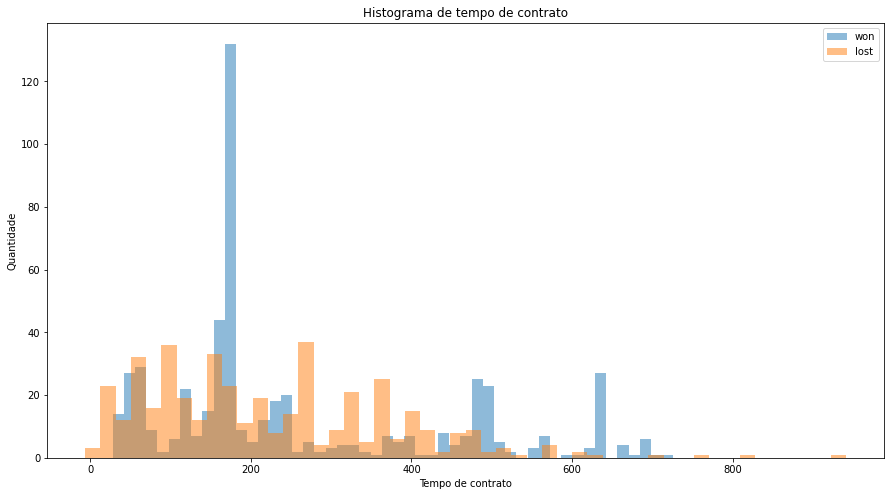

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/data-preprocessed.csv')

data['PESSOA_PIPEDRIVE_contract_end_date'] = pd.to_datetime(data['PESSOA_PIPEDRIVE_contract_end_date'], format='%Y-%m-%d')
data["PESSOA_PIPEDRIVE_contract_start_date"] = pd.to_datetime(data["PESSOA_PIPEDRIVE_contract_start_date"], format='%Y-%m-%d')
    
data['PESSOA_PIPEDRIVE_contract_end_date'].fillna(datetime.now(), inplace=True)
data['PESSOA_PIPEDRIVE_contract_start_date'].fillna(datetime.now(), inplace=True)

data['tempo_contrato'] = data['PESSOA_PIPEDRIVE_contract_end_date'] - data['PESSOA_PIPEDRIVE_contract_start_date']
data['tempo_contrato'] = data['tempo_contrato'].dt.days
    
plt.figure(figsize=(15,8))

for status in ["won", "lost"]:
    subset = data[data["FUNIL_ASSINATURA_PIPEDRIVE_status"] == status]
    plt.hist(subset["tempo_contrato"], bins=50, alpha=0.5, label=status)
    plt.title("Histograma de tempo de contrato")
    plt.xlabel("Tempo de contrato")
    plt.ylabel("Quantidade")
    plt.legend(loc="upper right")

plt.show()

A maior parte das pessoas que saíram, como mostrado no gráfico, ficou por pouco tempo na plataforma. Como o modelo é treinado nesses dados, isso vai se refletir na hora de prever quanto tempo que pessoas que estão na plataforma vão continuar, e a previsão na maioria das vezes vai ser que elas vão sair em pouco tempo, o que pode não refletir a realidade.